### Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación

### Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2021
Búsqueda y Recomendación para Textos Legales

Mentor: Jorge E. Pérez Villella

# Práctico Análisis y Visualización

Integrantes:

### Objetivos:

* Generar un corpus con todos los documentos. 

* Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf. 

* Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras? 

* Hacer lo mismo con n-gramas.

* Visualizar la frecuencia de palabras en una nube de palabras.

* Elaborar una breve conclusión de lo encontrado

Fecha de Entrega: 6 de junio de 2021

In [1]:
#!conda install -y -c anaconda spacy 

In [2]:
#!python -m spacy download es_core_news_sm

In [3]:
#!python -m spacy download es_core_news_md

In [4]:
#!conda install -y -c conda-forge wordcloud

In [5]:
#!conda install -y -c conda-forge textacy

In [6]:
#!conda install -y  -c anaconda nltk 

In [7]:
import spacy
from spacy.lang.es.examples import sentences
import glob
import os
import pandas as pd 
import shutil
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import textacy
import re
import nltk
from nltk.util import ngrams
import numpy as np

# Generar un corpus con todos los documentos

In [8]:

# Processor que reemplaza varios caracteres contra uno solo

class MapMultipleCharsToCharProcessor:
    
    def __init__(self, characters_to_replace, new_value = " " , to_lower = False):
        self.characters_to_replace = characters_to_replace
        self.new_value = new_value
        self.to_lower = to_lower
    
    def process(self, text):
        for ch in self.characters_to_replace:
            text = text.replace(ch,self.new_value)

        if self.to_lower:
            text = text.lower()
        return text

  
# Implementa un visitor. Se registran N procesors los cuales se ejecutan en el orden que fueron
# agregados.

class TextCleaner:
    
    def __init__(self):
        self.processors = []
    
    def registerProcessor(self, processor):
        self.processors.append(processor)
    
    
    def process(self, text):
        
        for processor in self.processors:
                text = processor.process(text)
    
        return text

    
# Tokeniza el string usando "tokenizer_symbol" 

def tokenize (text, tokenizer_symbol):
    result = text.split(tokenizer_symbol)
    
    return result


In [9]:
root_path = "Documentos"

directories = [x[0] for x in os.walk(root_path)]

directories.pop(0)

for directory in directories:
    print (directory)


Documentos/MENORES
Documentos/PENAL
Documentos/FAMILIA
Documentos/LABORAL


In [10]:
def generate_corpus_df(directories, text_cleaner):
    corpus = []

    for directory in directories:
      
        file_list = glob.glob(os.path.join(os.getcwd(), directory, "*.txt"))


        for file_path in file_list:
            with open(file_path) as f_input:
                corpus.append([text_cleaner.process(f_input.read()) , directory])

    return pd.DataFrame(corpus, columns=["text", "classifier"] )


In [11]:
characters_to_replace = [',', ':' , "\n" , "”"]
new_character = " "

mapMultipleCharsToChar = MapMultipleCharsToCharProcessor(characters_to_replace , new_character , True)
textCleaner = TextCleaner()
textCleaner.registerProcessor(mapMultipleCharsToChar)


corpus_df = generate_corpus_df(directories , textCleaner)
corpus_df

,text,classifier
0,datos de la causa sede ciudad de córdoba. de...,Documentos/MENORES
1,unívoco 18900 fecha 04/04/2016 materia niñe...,Documentos/MENORES
2,13/03/2013 juzgado de la niñez juventud y vio...,Documentos/MENORES
3,los autos caratulados a. a. - denuncia...,Documentos/MENORES
4,juzg. de niñez adolescencia y violencia famil...,Documentos/MENORES
...,...,...
238,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
239,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
240,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
241,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL


In [12]:
corpus_df.to_csv("corpus.csv" ,index= False)

In [13]:
corpus_df = pd.read_csv("corpus.csv")
corpus_df

,text,classifier
0,datos de la causa sede ciudad de córdoba. de...,Documentos/MENORES
1,unívoco 18900 fecha 04/04/2016 materia niñe...,Documentos/MENORES
2,13/03/2013 juzgado de la niñez juventud y vio...,Documentos/MENORES
3,los autos caratulados a. a. - denuncia...,Documentos/MENORES
4,juzg. de niñez adolescencia y violencia famil...,Documentos/MENORES
...,...,...
238,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
239,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
240,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
241,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL


In [14]:
def create_df_text_aggregated_by_jurisdiction (directories , corpus_df):

    aggregated_corpus =  []
    for directory in directories:
    
        text = corpus_df[corpus_df['classifier'] == directory ]['text'].tolist()
        text = " ".join(text)
        aggregated_corpus.append([text , directory])
        
    return pd.DataFrame(aggregated_corpus, columns=["text", "classifier"] )


In [15]:
aggregated_corups_df = create_df_text_aggregated_by_jurisdiction(directories, corpus_df)

In [16]:
aggregated_corups_df

,text,classifier
0,datos de la causa sede ciudad de córdoba. de...,Documentos/MENORES
1,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
2,auto número sesenta y seis córdoba cinco de...,Documentos/FAMILIA
3,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL


In [17]:
aggregated_corups_df.to_csv("aggregated_corpus.csv" ,index= False)

In [18]:
aggregated_corups_df = pd.read_csv("aggregated_corpus.csv")
aggregated_corups_df

,text,classifier
0,datos de la causa sede ciudad de córdoba. de...,Documentos/MENORES
1,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
2,auto número sesenta y seis córdoba cinco de...,Documentos/FAMILIA
3,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL


# Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf. 

In [19]:
def get_words(text): 
    words = tokenize(text, " ")
    words = [ word for word in words if not word.strip() == ""]
    #words = [ word for word in words ]
    return words


def get_words_ocrruence(words):
    
    word_freq = Counter(words)
    return pd.DataFrame(word_freq.most_common() , columns= ["word" , "count"])


In [20]:
#tmp = "datos de la causa sede  ciudad de córdoba.  dependencia  juzgado de niñez  adolescencia"
#get_words(tmp)

In [21]:
def get_word_ocurrence_df(classifier_name):

    text = aggregated_corups_df[aggregated_corups_df['classifier'] == classifier_name ]['text'].values[0]
    
    words = get_words(text)
    df = get_words_ocrruence(words)
    return (df, words)

In [22]:
(df_common_words_menores,common_words_menores ) = get_word_ocurrence_df('Documentos/MENORES')
(df_common_words_penal, common_words_penal)  = get_word_ocurrence_df('Documentos/FAMILIA')
(df_common_words_familia, common_words_familia)= get_word_ocurrence_df('Documentos/LABORAL')
(df_common_words_laboral, common_words_laboral) = get_word_ocurrence_df('Documentos/PENAL')

In [23]:
merged = pd.merge(df_common_words_menores,df_common_words_penal, on='word' , how='outer')
colums_names = ['word' , 'menores_word_count', 'penal_word_count']


merged = pd.merge(merged,df_common_words_familia, on='word' , how='outer')
colums_names = ['word' , 'menores_word_count', 'penal_word_count' , 'famila_word_count']

merged = pd.merge(merged,df_common_words_laboral, on='word' , how='outer')
colums_names = ['word' , 'menores_word_count', 'penal_word_count' , 'famila_word_count', 'laboral_word_count']

merged.columns = colums_names

merged.replace(np.nan, 0 , inplace=True)

merged['total_word_count'] = merged['menores_word_count'] + merged['penal_word_count'] + merged['famila_word_count'] + merged['laboral_word_count']
df_common_word_total = merged

In [24]:
df_common_words_menores.shape

(15053, 2)

In [25]:
df_common_words_penal.shape

(26564, 2)

In [26]:
df_common_words_familia.shape

(7475, 2)

In [27]:
df_common_words_laboral.shape

(29961, 2)

In [28]:
df_common_word_total.shape

(52926, 6)

In [29]:
def plot_word_frequency(axes , x , y , df , title , limit_to_plot ):
    
    seaborn.barplot(ax = axes , x=x, y=y, data=df.sort_values(y ,ascending=False)[0:limit_to_plot])
    axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
    axes.set_xlabel('Palabras')
    axes.set_ylabel('Ocurrencias')
    axes.set_title(title)

def plot_word_cloud (axes, df, limit_words, title , columns):
    
    tuples = [tuple(x) for x in df[columns].values]
    wordcloud = WordCloud(background_color="white" , max_words=limit_words).generate_from_frequencies(dict(tuples))

    axes.imshow(wordcloud, interpolation='bilinear')
    axes.axis('off')
    axes.set_title(title)
    

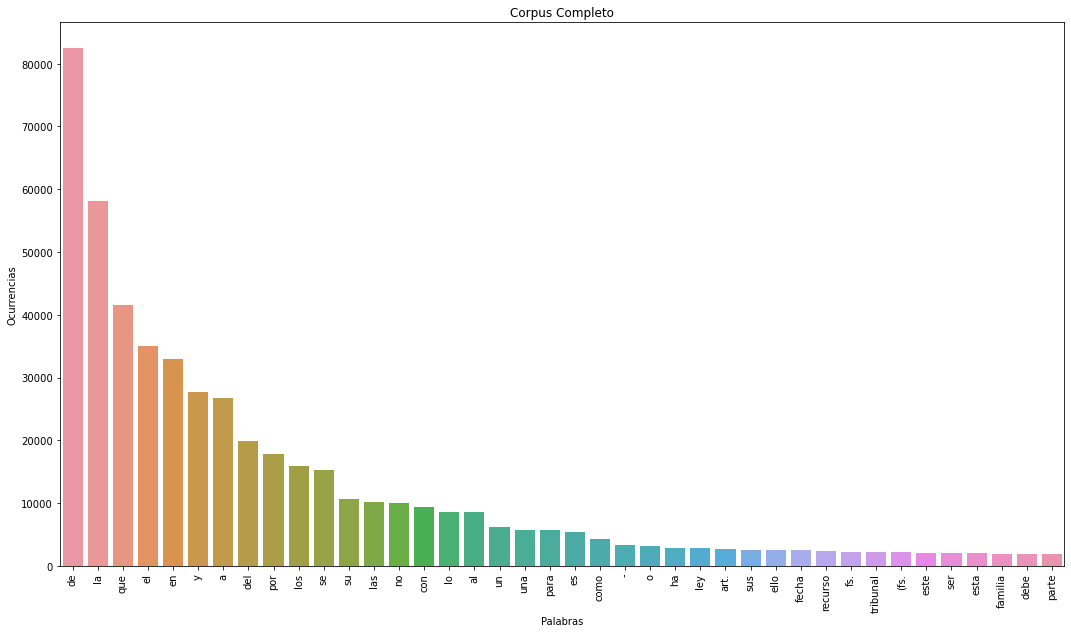

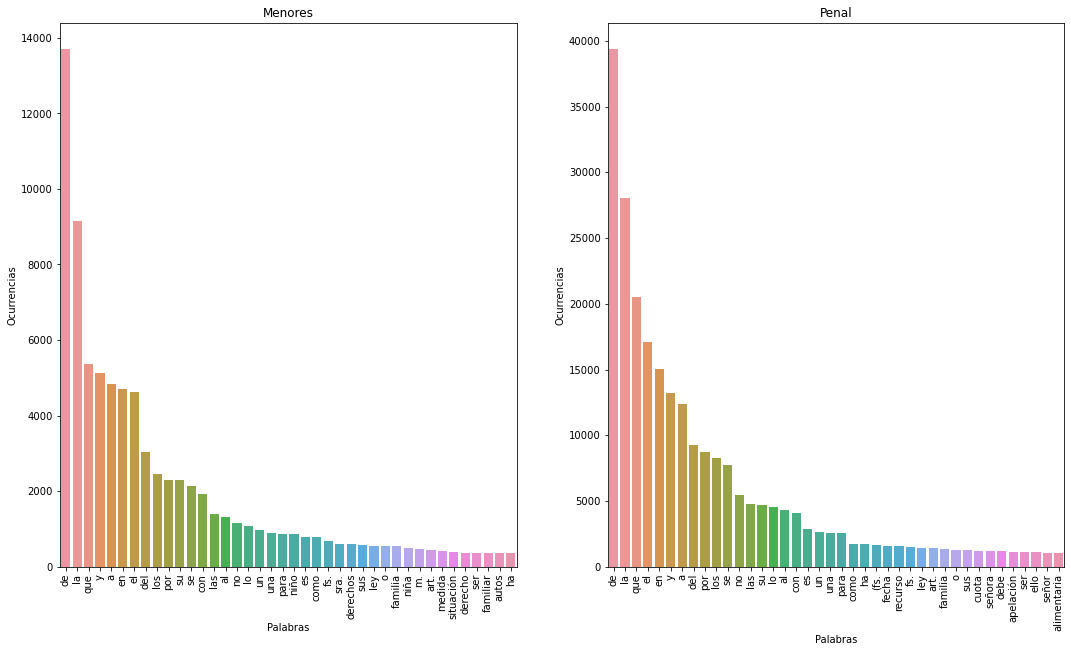

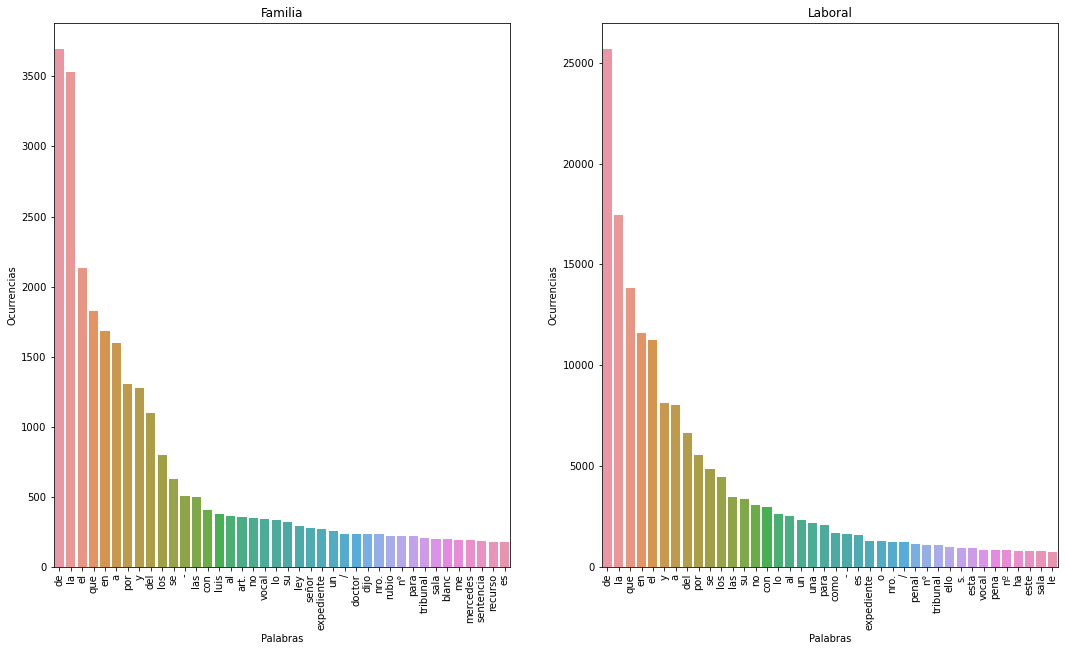

In [30]:
limit_to_plot=40

fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

plot_word_frequency (axes = axes, x = "word" , y = "total_word_count", df = df_common_word_total ,title ="Corpus Completo" , limit_to_plot = limit_to_plot )


fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_common_words_menores ,title ="Menores" , limit_to_plot = limit_to_plot )
plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_common_words_penal ,title ="Penal" , limit_to_plot = limit_to_plot )


fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_common_words_familia ,title ="Familia" , limit_to_plot = limit_to_plot )
plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_common_words_laboral ,title ="Laboral" , limit_to_plot = limit_to_plot )

# Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras?

# Hacer lo mismo con n-gramas.

In [31]:
def get_anagrams(words, n): 
    
    result = ngrams(words, n)
    words = Counter(result)
    return words

def get_anagrams_count_df(words, n_gram_count):

    words = get_anagrams(words,n_gram_count )
    df = get_words_ocrruence(words)
    return df

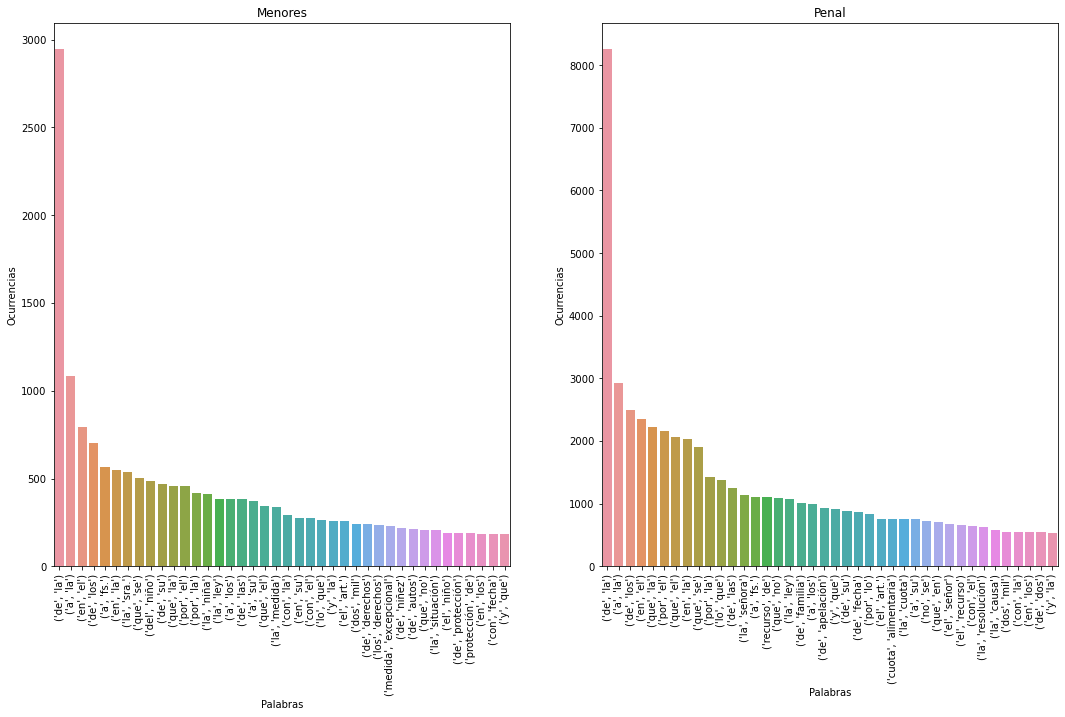

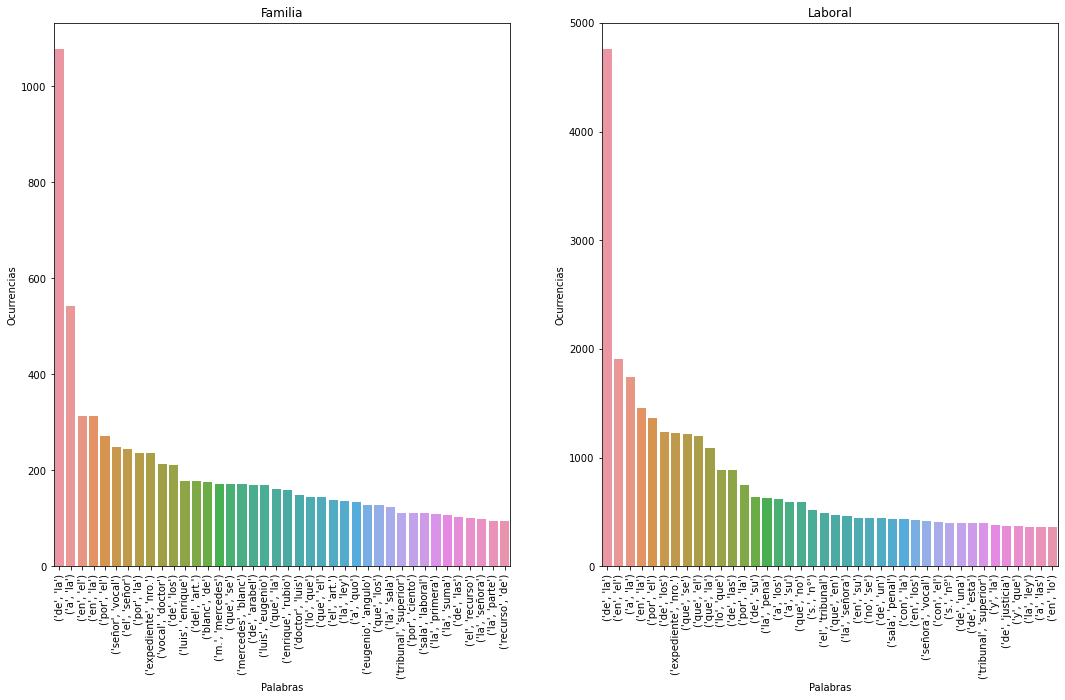

In [32]:
n_gram_count = 2

df_menores_anagrams_count = get_anagrams_count_df(common_words_menores,n_gram_count )
df_penal_anagrams_count = get_anagrams_count_df(common_words_penal,n_gram_count )
df_familia_anagrams_count = get_anagrams_count_df(common_words_familia,n_gram_count )
df_laboral_anagrams_count = get_anagrams_count_df(common_words_laboral,n_gram_count )


fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_menores_anagrams_count ,title ="Menores" , limit_to_plot = limit_to_plot )
plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_penal_anagrams_count ,title ="Penal" , limit_to_plot = limit_to_plot )

fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_familia_anagrams_count ,title ="Familia" , limit_to_plot = limit_to_plot )
plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_laboral_anagrams_count ,title ="Laboral" , limit_to_plot = limit_to_plot )

In [33]:
def get_df_word_cloud(df, column, column_order, limit_words):
   
    sorted_df = df.sort_values(column_order ,ascending=False)[0:limit_to_plot]
    sorted_df["word_"] = sorted_df.apply( lambda row:" ".join(row[column] ), axis=1)

    return sorted_df

In [34]:
# Nube de palabras de los anagramas

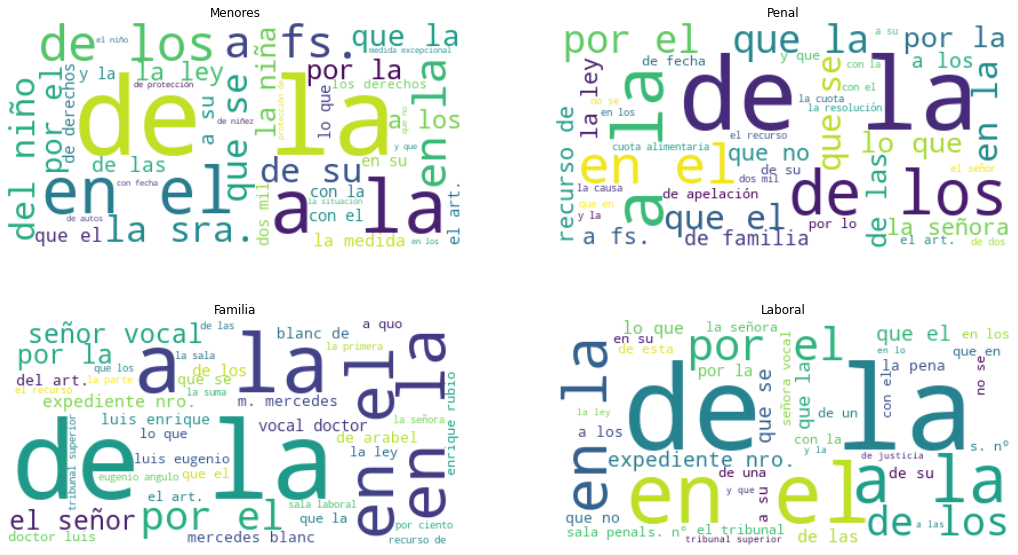

In [35]:
limit_words = 100




df_menores_anagrams_count_tmp = get_df_word_cloud(df = df_menores_anagrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_penal_anagrams_count_tmp =  get_df_word_cloud(df = df_penal_anagrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_familia_anagrams_count_tmp =  get_df_word_cloud(df = df_familia_anagrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_laboral_anagrams_count_tmp =  get_df_word_cloud(df = df_laboral_anagrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )

fig, axes = plt.subplots(2, 2 , figsize=(18, 10))

plot_word_cloud(axes[0][0], df_menores_anagrams_count_tmp , limit_words, "Menores" , columns = ["word_","count"])
plot_word_cloud(axes[0][1], df_penal_anagrams_count_tmp , limit_words, "Penal" , columns = ["word_","count"])
plot_word_cloud(axes[1][0], df_familia_anagrams_count_tmp , limit_words, "Familia" , columns = ["word_","count"])
plot_word_cloud(axes[1][1], df_laboral_anagrams_count_tmp , limit_words, "Laboral" , columns = ["word_","count"])

# Visualizar la frecuencia de palabras en una nube de palabras.

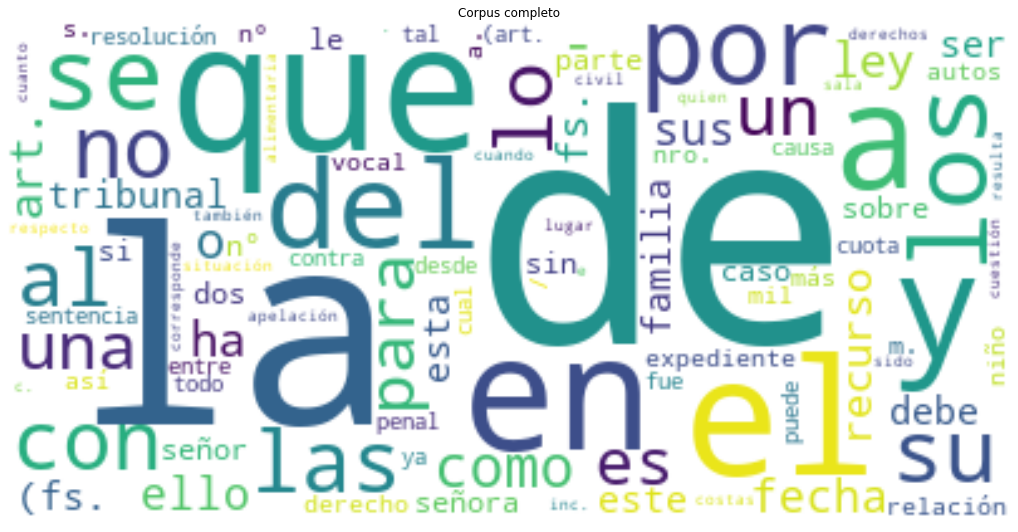

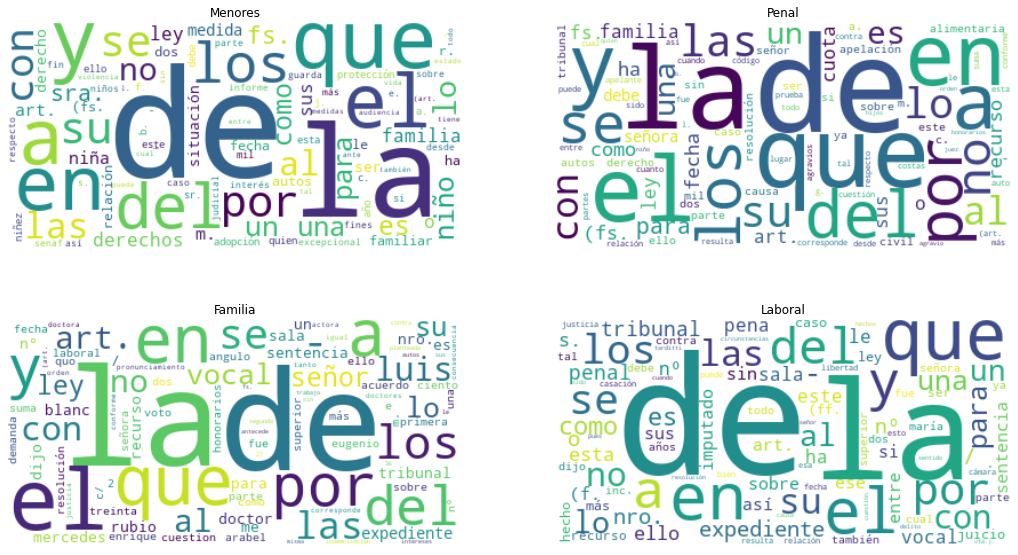

In [36]:
limit_words = 100

fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

plot_word_cloud(axes, df_common_word_total , limit_words, "Corpus completo" , columns = ["word","total_word_count"])

fig, axes = plt.subplots(2, 2 , figsize=(18, 10))

plot_word_cloud(axes[0][0], df_common_words_menores , limit_words, "Menores" , columns = ["word","count"])
plot_word_cloud(axes[0][1], df_common_words_penal , limit_words, "Penal" , columns = ["word","count"])
plot_word_cloud(axes[1][0], df_common_words_familia , limit_words, "Familia" , columns = ["word","count"])
plot_word_cloud(axes[1][1], df_common_words_laboral , limit_words, "Laboral" , columns = ["word","count"])